# Rcpp

## Plotting a density and bootstrapped confidence interval in R

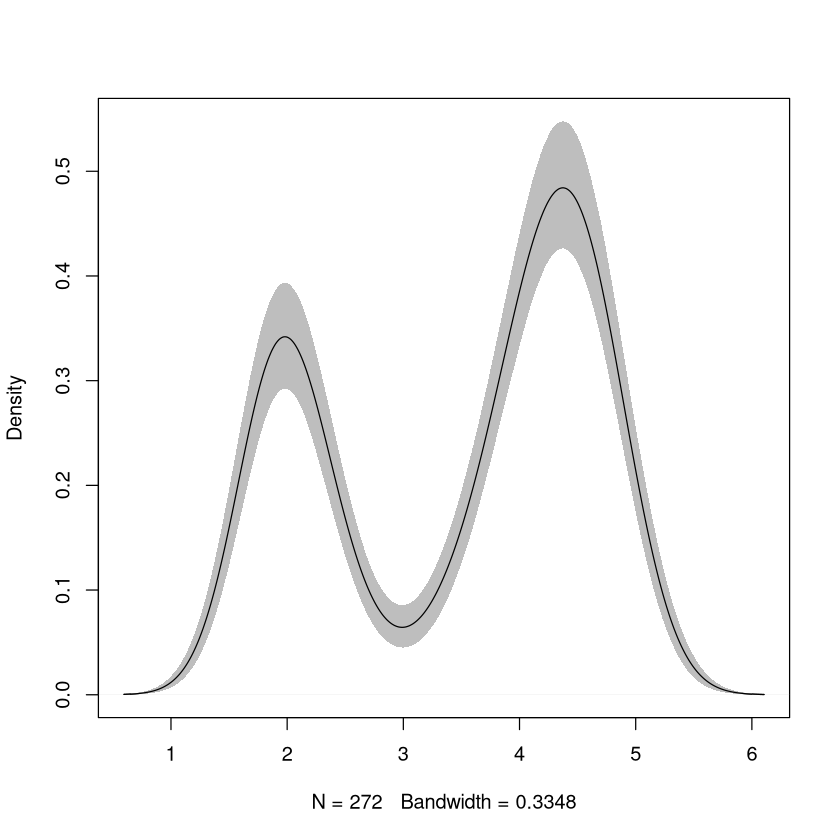

In [1]:
xx <- faithful$eruptions
fit1 <- density(xx)
fit2 <- replicate(10000, {
  x <- sample(xx, replace=TRUE);
  density(x, from = min(fit1$x), to = max(fit1$x))$y
})
fit3 <- apply(fit2, 1, quantile,c(0.025,0.975))
plot(fit1, ylim = range(fit3), main = "")
polygon(c(fit1$x, rev(fit1$x)), c(fit3[1,], rev(fit3[2,])), col = 'grey', border = F)
lines(fit1)

In [2]:
library(Rcpp)
library(inline)


Attaching package: ‘inline’


The following object is masked from ‘package:Rcpp’:

    registerPlugin




### Fibonacci Numbers

In [3]:
cppFunction(
    'int fibonacci(const int x) {
        if (x == 0) return(0); 
        if (x == 1) return(1);
        return (fibonacci(x - 1)) + fibonacci(x - 2);
    }')

fibonacci(5)

[1] 5

In [4]:
cppFunction(
  '
  NumericVector fun(NumericVector a, NumericVector b){
    Rcpp::NumericVector xa(a);
    Rcpp::NumericVector xb(b);
    int n_xa = xa.size(), n_xb = xb.size();
  
    Rcpp::NumericVector xab(n_xa + n_xb - 1);
    for (int i = 0; i < n_xa; i++)
      for (int j = 0; j < n_xb; j++)
        xab[i + j] += xa[i] * xb[j];
    return xab;
  }
  ')

fun(1:4, 2:5)

[1]  2  7 16 30 34 31 20

### Generalised Sum of Squares

In [5]:
cppFunction(
  '
  double gen_sumsq(NumericVector x, double p){
    double sum=0.0;
    for(int i=0; i<x.size();++i)
      sum+=pow(x[i], p);
    return sum;
  }
  ')

gen_sumsq(4:12, 2.89)

#Comparison of performance

library(microbenchmark)

gen_sumsq_R <- function(x, p){
  sum(x^p)
}

x <- 400:7000

microbenchmark(
  gen_sumsq(x, p=7.3),
  gen_sumsq_R(x, p=7.3)
)

[1] 4707.107

expr                    time   
1   gen_sumsq_R(x, p = 7.3)  307035
2   gen_sumsq(x, p = 7.3)   1846475
3   gen_sumsq(x, p = 7.3)    272598
4   gen_sumsq_R(x, p = 7.3) 2432036
5   gen_sumsq_R(x, p = 7.3)  288170
6   gen_sumsq(x, p = 7.3)    273746
7   gen_sumsq(x, p = 7.3)    271010
8   gen_sumsq(x, p = 7.3)    268135
9   gen_sumsq(x, p = 7.3)    270740
10  gen_sumsq_R(x, p = 7.3)  286620
11  gen_sumsq(x, p = 7.3)    274835
12  gen_sumsq_R(x, p = 7.3)  285963
13  gen_sumsq(x, p = 7.3)    269326
14  gen_sumsq_R(x, p = 7.3)  295836
15  gen_sumsq(x, p = 7.3)    273047
16  gen_sumsq(x, p = 7.3)    270850
17  gen_sumsq_R(x, p = 7.3)  286475
18  gen_sumsq(x, p = 7.3)    268925
19  gen_sumsq_R(x, p = 7.3)  286209
20  gen_sumsq(x, p = 7.3)    268735
21  gen_sumsq(x, p = 7.3)    268158
22  gen_sumsq(x, p = 7.3)    270681
23  gen_sumsq(x, p = 7.3)    270607
24  gen_sumsq_R(x, p = 7.3)  286482
25  gen_sumsq_R(x, p = 7.3)  286051
26  gen_sumsq(x, p = 7.3)    279365
27  gen_sumsq_R(x, p = 7.3)  287352
28  gen_sumsq(x, p = 7.3)    276058
29  gen_sumsq_R(x, p = 7.3)  286326
30  gen_sumsq_R(x, p = 7.3)  287985
⋮   ⋮                       ⋮      
171 gen_sumsq(x, p = 7.3)   270513 
172 gen_sumsq(x, p = 7.3)   280667 
173 gen_sumsq_R(x, p = 7.3) 307557 
174 gen_sumsq_R(x, p = 7.3) 289629 
175 gen_sumsq(x, p = 7.3)   271205 
176 gen_sumsq(x, p = 7.3)   272534 
177 gen_sumsq(x, p = 7.3)   269847 
178 gen_sumsq(x, p = 7.3)   269822 
179 gen_sumsq_R(x, p = 7.3) 286069 
180 gen_sumsq(x, p = 7.3)   279907 
181 gen_sumsq(x, p = 7.3)   273363 
182 gen_sumsq_R(x, p = 7.3) 286600 
183 gen_sumsq_R(x, p = 7.3) 285704 
184 gen_sumsq_R(x, p = 7.3) 286231 
185 gen_sumsq(x, p = 7.3)   270934 
186 gen_sumsq(x, p = 7.3)   269533 
187 gen_sumsq_R(x, p = 7.3) 285993 
188 gen_sumsq_R(x, p = 7.3) 286358 
189 gen_sumsq(x, p = 7.3)   272644 
190 gen_sumsq(x, p = 7.3)   272209 
191 gen_sumsq_R(x, p = 7.3) 286093 
192 gen_sumsq_R(x, p = 7.3) 294907 
193 gen_sumsq_R(x, p = 7.3) 285991 
194 gen_sumsq_R(x, p = 7.3) 285788 
195 gen_sumsq_R(x, p = 7.3) 285317 
196 gen_sumsq_R(x, p = 7.3) 287284 
197 gen_sumsq(x, p = 7.3)   270353 
198 gen_sumsq_R(x, p = 7.3) 286453 
199 gen_sumsq(x, p = 7.3)   273008 
200 gen_sumsq(x, p = 7.3)   271727

A large number of user-visible classes derive from the RObject class:

- `IntegerVector` for vectors of type integer.
- `NumericVector` for vectors of type numeric.
- `LogicalVector` for vectors of type logical.
- `CharacterVector` for vectors of type character.
- `GenericVector` for generic vectors which implement List types.
- `ExpressionVector` for vectors of expression types.
- `RawVector` for vectors of type raw.

For the integer and numeric types, we also have `IntegerMatrix` and `NumericMatrix` corresponding to the equivalent R types, and similarly implemented as vectors with associated dimension attributes specifying row and column sizes.

As one illustrative example, consider the so-called sequence container types  
vector, deque, and list. Each of these supports common functions such as  
`push_back()` to insert at the end
`pop_back()` to remove from the front
`begin()` returning an iterator to the first element
`end()` returning an iterator to just after the last element
`size()` for the number of elements

and more similar functions. However, list offers different performance guarantees and implementation details than vector so it can also offer complementary functions such as `push_front()` and `pop_front()` which a vector does not have. On the other hand, `v[i]` can access the element with index i in the vector (which offers random access), whereas a list has to be traversed.

Key operations for all vectors, styled after STL operations:  

`operator()` access elements via ()  
`operator[]` access elements via []  
`length()` also aliased to size()  
`fill(u)` fills vector with value of u  
`begin()` pointer to beginning of vector, for iterators  
`end()` pointer to one past end of vector  
`push_back(x)` insert x at end, grows vector  
`push_front(x)` insert x at beginning, grows vector  
`insert(i, x)` insert x at position i, grows vector  
`erase(i)` remove element at position i, shrinks vector

Rcpp::NumericVector mat = \
Rcpp::clone<Rcpp::NumericMatrix>(mx); \
std::transform(mat.begin(), mat.end(), \
mat.begin(), ::sqrt(); \
return mat;

### Matrices

In [6]:
cppFunction(
  '
  NumericMatrix fun_mat(NumericMatrix mx){
    Rcpp::NumericMatrix mat = Rcpp::clone<Rcpp::NumericMatrix>(mx);
    std::transform(mat.begin(), mat.end(), mat.begin(), ::sqrt);
    return mat;
  }
  ')

fun_mat(matrix(1:9, 3))

[,1]     [,2]     [,3]    
[1,] 1.000000 2.000000 2.645751
[2,] 1.414214 2.236068 2.828427
[3,] 1.732051 2.449490 3.000000

### Dataframes

In [7]:
cppFunction(
  '
  DataFrame fun_frame(){
    Rcpp::IntegerVector v = Rcpp::IntegerVector::create(7,8,9);
    std::vector<std::string> s(3);
    s[0] = "x";
    s[1] = "y";
    s[2] = "z";
    return Rcpp::DataFrame::create(Rcpp::Named("a")=v, Rcpp::Named("b")=s);
  }
  ')

### fastLm

This is a faster reimplementation of `lm()`, suitable for repeated use in Monte Carlo

In [9]:
library(RcppEigen)
data(trees, package = "datasets")
mm <- cbind(1, log(trees$Girth))   # model matrix
y  <- log(trees$Volume)            # response

## bare-bones direct interface
flm <- fastLmPure(mm, y)
print(flm)

$coefficients
[1] -2.353325  2.199970

$se
[1] 0.23066284 0.08983455

$rank
[1] 2

$df.residual
[1] 29

$residuals
 [1]  0.029770334 -0.048343313 -0.108675736 -0.022348590  0.072716847
 [6]  0.099013629 -0.174701646 -0.020550966  0.176067980  0.029107001
[11]  0.205184486  0.043971170  0.062839654  0.001010516 -0.163706638
[16] -0.172405965  0.247962548 -0.029135115 -0.158376200 -0.205999241
[21]  0.088437490 -0.027410923  0.062096059 -0.100836986 -0.035300119
[26]  0.096435946  0.076549210  0.072452205 -0.063824212 -0.073580387
[31]  0.041580960

$s
[1] 0.1149578

$fitted.values
 [1] 2.302374 2.380487 2.431063 2.819630 2.861140 2.881605 2.921973 2.921973
 [9] 2.941882 2.961613 2.981168 3.000551 3.000551 3.057697 3.113395 3.272498
[17] 3.272498 3.339678 3.404867 3.420867 3.452522 3.483728 3.529722 3.746287
[25] 3.787154 3.918144 3.943431 3.993150 4.005406 4.005406 4.302224



An even faster option is to use the below function, however, without formula interface.

In [10]:
cppFunction(depends = "RcppArmadillo",
  '
  List fLm(NumericMatrix Xs, NumericVector ys){
    int n = Xs.nrow(), k = Xs.ncol();
    arma::mat X(Xs.begin(), n, k, false);
    arma::colvec y(ys.begin(), ys.size(), false);
    int df = n - k;
    // fit model y ~ X, extract residuals
    arma::colvec coef = arma::solve(X, y);
    arma::colvec res = y - X*coef;
    double s2 = std::inner_product(res.begin(), res.end(), res.begin(), 0.0)/df;
    // std.errors of coefficients
    arma::colvec sderr = arma::sqrt(s2 * arma::diagvec(arma::pinv(arma::trans(X)*X)));
    return Rcpp::List::create(Rcpp::Named("coefficients")=coef, Rcpp::Named("stderr") =sderr, Rcpp::Named("df") =df);
  }
  ')

fLm(mm, y)

Registered S3 methods overwritten by 'RcppArmadillo':
  method               from     
  predict.fastLm       RcppEigen
  print.fastLm         RcppEigen
  summary.fastLm       RcppEigen
  print.summary.fastLm RcppEigen



$coefficients
          [,1]
[1,] -2.353325
[2,]  2.199970

$stderr
           [,1]
[1,] 0.23066284
[2,] 0.08983455

$df
[1] 29

### Accessing an R Function

In [11]:
cppFunction(
  '
  NumericVector sup_fun(unsigned int df, unsigned int n){
    RNGScope scp;
    Rcpp::Function rt("rt");
    return rt(n, df);
  }
  ')

sup_fun(3, 10)

[1] -1.52184755 -0.67680149  0.06883005  2.57027411 -0.63182553  0.28956111
 [7]  1.29411525 -1.14328150 -3.24308832  0.40131080